In [19]:
# Fit Model
install.packages("tree")
library(MASS)
library(tree)




The downloaded binary packages are in
	/var/folders/4s/3pfrzvw51jg_991fbyn28mz40000gp/T//RtmpylOKgT/downloaded_packages


[1] 55267

[1] 21

In [54]:
raw.data <- read.table("~/STAT406-final-project/clean_data/clean_data.txt", header=T, sep=",")
nrow(raw.data)
ncol(raw.data)

factor.vars <- c("state", "rural", "sex", "treatment_source" , "death_symptoms", "factors_contributing_death",
"factors_contributing_death_2","religion","marital_status", "highest_qualification","occupation_status",
"chew", "smoke", "alcohol", "drinking_water_source", "is_water_filter", "toilet_used",
"household_have_electricity")

raw.data$state <- factor(raw.data$state)

split(names(raw.data),
      sapply(raw.data, function(x) paste(class(x), collapse=" ")))


[1] 55267

[1] 21

$factor
[1] "state"

$integer
 [1] "id"                           "rural"                       
 [3] "treatment_source"             "death_symptoms"              
 [5] "factors_contributing_death"   "factors_contributing_death_2"
 [7] "sex"                          "religion"                    
 [9] "marital_status"               "highest_qualification"       
[11] "occupation_status"            "chew"                        
[13] "smoke"                        "alcohol"                     
[15] "drinking_water_source"        "is_water_filter"             
[17] "toilet_used"                  "household_have_electricity"  
[19] "age_of_death_above_one_year" 

$numeric
[1] "as"

In [56]:
raw.data[factor.vars] <- lapply(raw.data[factor.vars],
                               factor)

split(names(raw.data),
      sapply(raw.data, function(x) paste(class(x), collapse=" ")))


$factor
 [1] "state"                        "rural"                       
 [3] "treatment_source"             "death_symptoms"              
 [5] "factors_contributing_death"   "factors_contributing_death_2"
 [7] "sex"                          "religion"                    
 [9] "marital_status"               "highest_qualification"       
[11] "occupation_status"            "chew"                        
[13] "smoke"                        "alcohol"                     
[15] "drinking_water_source"        "is_water_filter"             
[17] "toilet_used"                  "household_have_electricity"  

$integer
[1] "id"                          "age_of_death_above_one_year"

$numeric
[1] "as"

In [58]:
# probability of 
drop <- c("id")
raw.data <- raw.data[,!(names(raw.data) %in% drop)]
head(raw.data)
split(names(raw.data),
      sapply(raw.data, function(x) paste(class(x), collapse=" ")))


state,rural,treatment_source,death_symptoms,factors_contributing_death,factors_contributing_death_2,sex,religion,marital_status,highest_qualification,occupation_status,chew,smoke,alcohol,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,as,age_of_death_above_one_year
18,1,5,9,4,4,1,2,4,0,3,2,4,4,6,2,7,2,-5.402839,35
18,1,6,10,7,1,1,1,3,1,2,5,4,4,6,2,0,2,-4.536228,25
18,1,6,14,4,1,1,1,3,0,1,7,1,1,6,2,0,2,-5.392297,22
18,1,6,4,1,5,1,1,5,0,10,4,4,2,4,2,0,2,-5.425876,27
18,1,3,9,5,7,2,1,3,6,10,2,4,4,3,2,3,2,1.251827,30
18,1,6,2,5,4,1,1,3,0,3,5,2,1,3,1,7,2,-4.296853,22


$factor
 [1] "state"                        "rural"                       
 [3] "treatment_source"             "death_symptoms"              
 [5] "factors_contributing_death"   "factors_contributing_death_2"
 [7] "sex"                          "religion"                    
 [9] "marital_status"               "highest_qualification"       
[11] "occupation_status"            "chew"                        
[13] "smoke"                        "alcohol"                     
[15] "drinking_water_source"        "is_water_filter"             
[17] "toilet_used"                  "household_have_electricity"  

$integer
[1] "age_of_death_above_one_year"

$numeric
[1] "as"

In [59]:
# regression tree
train = sample(1:nrow(raw.data), nrow(raw.data)/2)
death.tree = tree(age_of_death_above_one_year~., 
                 raw.data, subset=train )
summary(death.tree)


Regression tree:
tree(formula = age_of_death_above_one_year ~ ., data = raw.data, 
    subset = train)
Variables actually used in tree construction:
[1] "death_symptoms" "as"            
Number of terminal nodes:  3 
Residual mean deviance:  614.1 = 16970000 / 27630 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-61.400  -9.400   1.702   0.000  16.700  97.750 

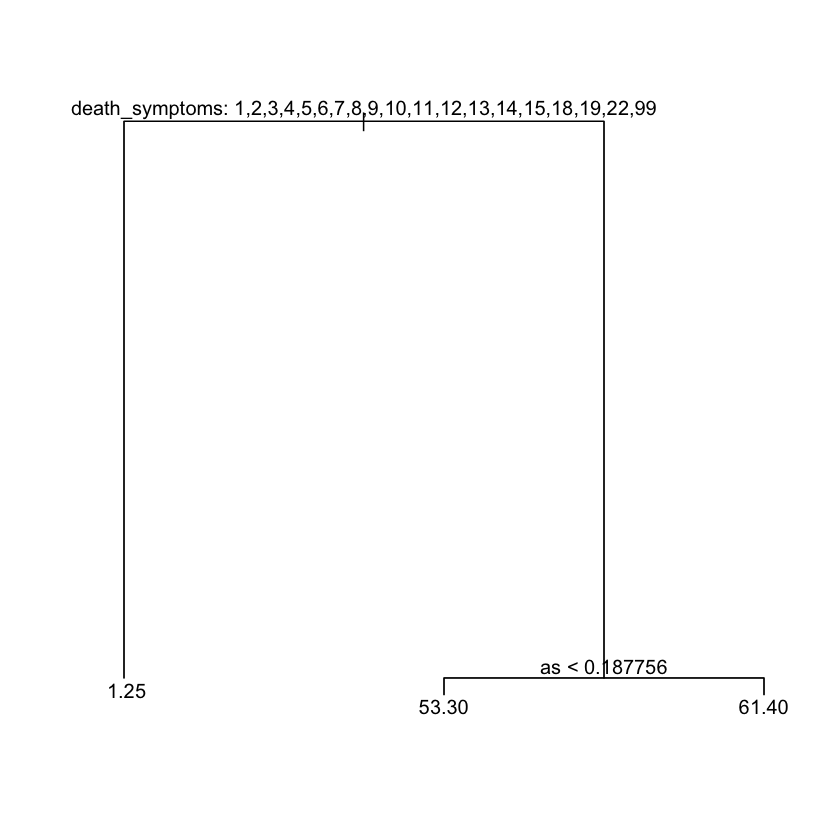

In [60]:
plot(death.tree)
text(death.tree, pretty=0)